# Introduction

Using LSTM model to predict stonks(stocks) closing price.

Notebook adapted from: https://www.kaggle.com/faressayah/stock-market-analysis-prediction-using-lstm

In [65]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
# For time stamps
from datetime import datetime

## 0. Get stonk data from yahoo

In [66]:
symbol = 'MSFT'

# Get the stock quote
df = DataReader(symbol, data_source='yahoo', start='2012-01-01', end=datetime.now())
# Show teh data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,26.959999,26.389999,26.549999,26.770000,64731500.0,21.799267
2012-01-04,27.469999,26.780001,26.820000,27.400000,80516100.0,22.312283
2012-01-05,27.730000,27.290001,27.379999,27.680000,56081400.0,22.540291
2012-01-06,28.190001,27.530001,27.530001,28.110001,99455500.0,22.890448
2012-01-09,28.100000,27.719999,28.049999,27.740000,59706800.0,22.589146
...,...,...,...,...,...,...
2021-03-01,237.470001,233.149994,235.899994,236.940002,25324000.0,236.940002
2021-03-02,237.300003,233.449997,237.009995,233.869995,22785500.0,233.869995
2021-03-03,233.580002,227.259995,232.160004,227.559998,33950400.0,227.559998


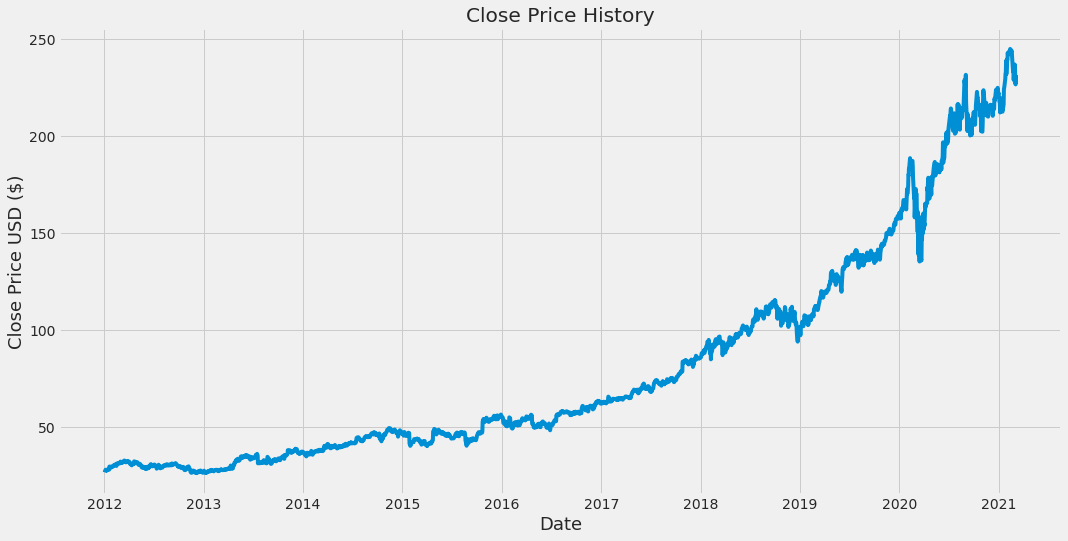

In [67]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

## 1. Create training set data

In [68]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .90 ))

training_data_len

2078

In [69]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00182966],
       [0.00471137],
       [0.00599213],
       ...,
       [0.92027258],
       [0.91647603],
       [0.93875218]])

In [70]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

[array([0.00182966, 0.00471137, 0.00599213, 0.00795901, 0.00626658,
       0.00672399, 0.00617509, 0.00745586, 0.00859939, 0.00864513,
       0.00850791, 0.00800476, 0.01527764, 0.01536913, 0.01358521,
       0.01459152, 0.01431708, 0.01308205, 0.01482023, 0.0144543 ,
       0.01610099, 0.01637545, 0.01770194, 0.01751898, 0.0182051 ,
       0.01962309, 0.02012624, 0.01889122, 0.01925715, 0.01774769,
       0.01683285, 0.0225048 , 0.02232183, 0.02319092, 0.02241332,
       0.02287073, 0.02337388, 0.02277925, 0.02515781, 0.02456316,
       0.02707895, 0.02611838, 0.02483761, 0.02373982, 0.02502058,
       0.02579818, 0.0257067 , 0.02593541, 0.02881711, 0.02927454,
       0.02964046, 0.02849692, 0.02666728, 0.0257067 , 0.02534077,
       0.02575244, 0.02579818, 0.02845119, 0.028131  , 0.02662152])]
[0.0263013355148055]

[array([0.00182966, 0.00471137, 0.00599213, 0.00795901, 0.00626658,
       0.00672399, 0.00617509, 0.00745586, 0.00859939, 0.00864513,
       0.00850791, 0.00800476, 0.015

(2018, 60, 1)

## 2. Define the LSTM model + training

In [61]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

1902/1902 [==============================] - 31s 16ms/step - loss: 7.4170e-05


In [62]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

22.724098330458588

## 3. Prediction

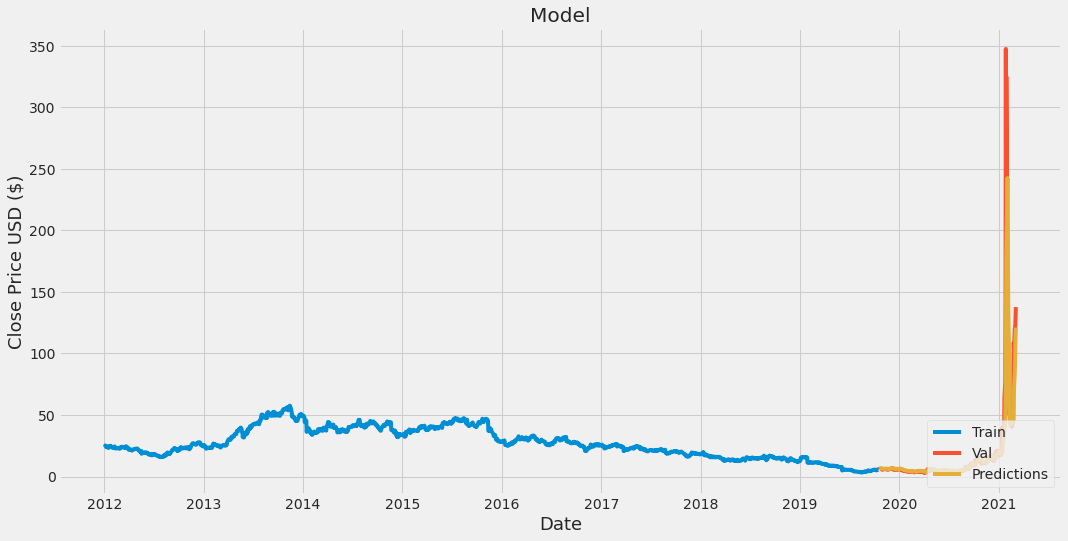

In [63]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [64]:
# Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2019-10-21,5.930000,6.213285
2019-10-22,6.390000,6.296149
2019-10-23,6.430000,6.431654
2019-10-24,6.420000,6.570604
2019-10-25,6.350000,6.680297
...,...,...
2021-03-01,120.400002,84.163589
2021-03-02,118.180000,97.380394
2021-03-03,124.180000,107.286430
